In [ ]:
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.circuit.library import zz_feature_map
from qiskit_aer.primitives import SamplerV2

from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit_machine_learning.algorithms import QSVC


In [ ]:
feature_dimension=2
reps=2

#Load Data
train_features, train_labels, test_features, test_labels, _ = ad_hoc_data(
    training_size=25,
    test_size=10,
    n=2,
    gap=0.6,
    plot_data=False,
    one_hot=False,
    include_sample_total=True
)

In [99]:
#Data Encoding (zz)
feature_map = zz_feature_map(feature_dimension=feature_dimension, reps=reps, entanglement="linear")

#Why this kind of data encoding?

In [100]:
#Create Quantum Kernel
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

In [101]:
#Train the QSVC

qsvc = QSVC(quantum_kernel=quantum_kernel)
qsvc.fit(train_features, train_labels)

kernel_matrix_train = quantum_kernel.evaluate(train_features)  # shape: (n_samples, n_samples)
kernel_matrix_test = quantum_kernel.evaluate(test_features, train_features)  # shape: (n_test, n_train)

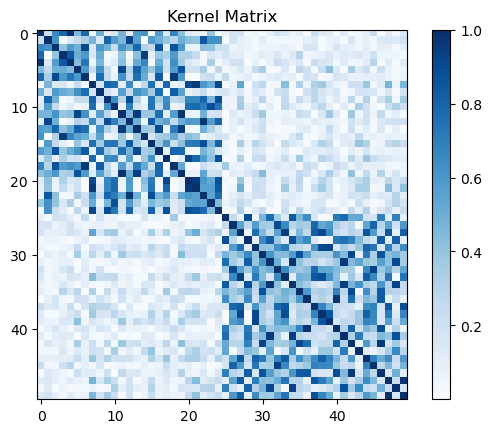

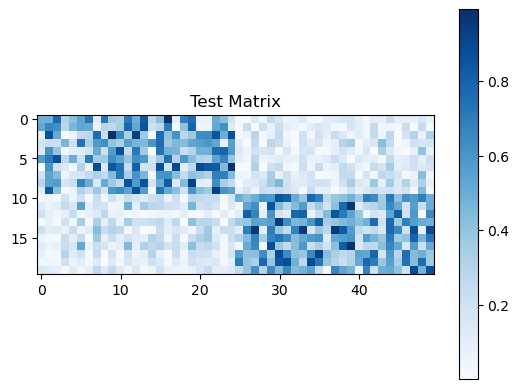

1.0


In [102]:
#Analyze Results
import matplotlib.pyplot as plt

plt.imshow(kernel_matrix_train, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Kernel Matrix")
plt.show()

plt.imshow(kernel_matrix_test, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Test Matrix")
plt.show()

score = qsvc.score(test_features, test_labels)
print(score)